In [147]:
from obspy import read, Trace, UTCDateTime
import glob, os 
import matplotlib.pyplot as plt
from obspy.signal.rotate import rotate_ne_rt
import pickle

In [283]:
fmin = 0.05
fmax = 0.3

In [284]:
st = read('20220818_190003/*mseed')
st.detrend('linear')
st.detrend('demean')
HHN = st.select(component='N')[0]
HHE = st.select(component='E')[0]
time = HHN.times()

In [285]:
HHR, HHT = rotate_ne_rt(HHN.data, HHE.data, ba=270)
trR = Trace(data=HHR[:])
trR.times = time
trR.stats.delta = 0.05
trR.stats.starttime=HHN.stats.starttime
trT = Trace(data=HHT[:])
trT.times = time
trT.stats.delta = 0.05
trT.stats.starttime=HHN.stats.starttime

trR.filter(type='bandpass',freqmin=fmin, freqmax=fmax, zerophase=True, corners=4)

... | 2022-08-18T19:00:03.000000Z - 2022-08-18T19:03:02.950000Z | 20.0 Hz, 3600 samples

In [286]:
path = '/Volumes/home/06_NTU_thesis/Thesis_figure/Ch3/non-Null/20160804_141513'
st_real = read(f'{path}/ZNE_data.pkl') 
st_real.detrend('linear')
st_real.detrend('demean')
st_time = st_real[0].times(reftime=UTCDateTime('2016-08-04T14:15:13'))
st_real.filter(type='bandpass',freqmin=fmin, freqmax=fmax, zerophase=True, corners=4)
trN_real = st_real.select(component='N')[0]
trE_real = st_real.select(component='E')[0]



In [287]:
HHR_real, HHT_real = rotate_ne_rt(trN_real.data, trE_real.data, ba=265)
trR_real = Trace(data=HHR_real[:])
trR_real.times = st_time
trR_real.stats.delta = 0.1
trR_real.stats.starttime=trN_real.stats.starttime
trT_real = Trace(data=HHT_real[:])
trT_real.times = time
trT_real.stats.delta = 0.1
trT_real.stats.starttime=trN_real.stats.starttime
# st_time = trR.times()


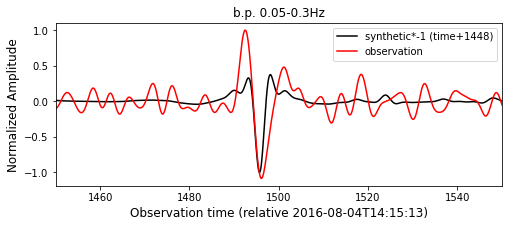

In [288]:
timeshift=1448

plt.figure(figsize=(8,3))
plt.title(f'b.p. {fmin}-{fmax}Hz',fontsize=12)
plt.plot(time+timeshift,trR.data/max(trR.data)*-1,label=f'synthetic*-1 (time+{timeshift})',c='k')
plt.plot(st_time,trR_real.data/max(trR_real.data),label='observation',c='r')
plt.xlim(1450,1550)
plt.xticks()
plt.xlabel('Observation time (relative 2016-08-04T14:15:13)',fontsize=12)
plt.ylabel('Normalized Amplitude',fontsize=12)
plt.legend()

plt.savefig(f'Compare_waveform_{fmin}-{fmax}.png',dpi=150, bbox_inches='tight')